# CS5228 Assignment 2 - DBSCAN, AGNES & Association Rule Mining

Hello everyone, this assignment notebook covers DBSCAN, AGNES, Association Rule Mining (ARM). There are some code-completion tasks and question-answering tasks in this answer sheet. For code completion tasks, please write down your answer (i.e., your lines of code) between sentences that "Your code starts here" and "Your code ends here". The space between these two lines does not reflect the required or expected lines of code. For answers in plain text, you can refer to [this Markdown guide](https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd) to customize the layout (although it shouldn't be needed).

When you work on this notebook, you can insert additional code cells (e.g., for testing) or markdown cells (e.g., to keep track of your thoughts). However, before the submission, please remove all those additional cells again. Thanks!

**Important:** 
* Rename and save this Jupyter notebook as **cs5228_a2_YourName_YourNUSNETID.ipynb** (e.g., **cs5228_a2_BobSmith_e12345678.ipynb**) before submission!
* Rename and save the script file *cs5228_a2_script.py* as **cs5228_a2_YourName_YourNUSNETID.py** (e.g., **cs5228_a2_BobSmith_e12345678.py**) before submission!
* Submission deadline is Sep 28, 11.59 pm. Late submissions will be penalized by 10% for each additional day. Failure to appropriately rename both files will yield a penalty of 1 Point. There is no need to use your full name if its a rather long; it's just  important to easily identify you in Canvas etc.

Please also add your NUSNET and student id in the code cell below. This is just to make any identification of your notebook doubly sure.

In [1]:
student_id = 'A0285647M'
nusnet_id = 'e1216292'

In [2]:
#Auto reload
%load_ext autoreload
%autoreload 2

Here is an overview over the tasks to be solved and the points associated with each task. The notebook can appear very long and verbose, but note that a lot of parts provide additional explanations, documentation, or some discussion. The code and markdown cells you are supposed to complete are well, but you can use the overview below to double-check that you covered everything.

* **1 DBSCAN (15 Points)**
    * 1.1Implementing DBSCAN for Noise Detection (10 Points)
        * 1.1 a) Compute Core Points (5 Points)
        * 1.2 b) Compute Noise Points (5 Points)
    * 1.2 Questions about DBSCAN (5 Points)
        * 1.2 a) Basic Data Understanding with DBSCAN (3 Points)
        * 1.2 b) Finding all Cluster (2 Points)
* **2 AGNES (10 Points)**
    * 2.1 Interpreting Dendrograms (6 Points)
    * 2.2 Questions about AGNES (4 Points)
        * 2.2 a) Picking the Right Linkage Method (2 Points)
        * 2.2 b) Outlier Detection with AGNES(2 Points)
* **3 Association Rule Mining (25 Points)**
    * 3.1 Brute-Forcing Association Rule Mining (5 Points)
    * 3.2 Implementing Apriori Algorithm for Finding Frequent Itemsets (10 Points)
        * 3.2 a) Generating Candidate Itemsets $L_{k}$ (5 Points)
        * 3.2 b) Generating Frequent Itemsets $F_{1}$, $F_{2}$, $F_{3}$, ... (5 Points)
    * 3.3 ARM over Real-World Datasets -- Questions (10 Points)
        * 3.3 a) (3 Points)
        * 3.3 b) (3 Points)
        * 3.3 c) (2 Points)
        * 3.3 d) (2 Points)

## Setting up the Notebook

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

from efficient_apriori import apriori
import copy
from src.utils import *

**Important:** This notebook also requires you to complete in a separate `.py` script file. This keeps this notebook cleaner and simplifies testing your implementations for us. As you need to rename the file `cs5228_a2.py`, you also need to edit the import statement below accordingly.

In [2]:
from cs5228_a2_ParasharaRamesh_e1216292 import *
#from cs5228_a2_BobSmith_e12345678 import *  # <-- you will need to rename this accordingly

## 1 DBSCAN

The Density-Based Spatial Clustering of Applications with Noise (DBSCAN) algorithm is a clustering algorithm used in data mining and machine learning. It is designed to identify clusters in data that may have arbitrary shapes and handle outliers effectively. Here's a more detailed explanation of how the DBSCAN algorithm works:

* **Density-Based Clustering:** DBSCAN identifies clusters based on the density of data points in the feature space rather than assuming a specific cluster shape.

* **Core Points:** The algorithm starts by selecting a random data point. It then checks how many data points are within a specified distance (epsilon or ε) from this point. If the number of data points within this distance exceeds a predefined threshold called MinPts (including the data point itself), the selected point is classified as a "core point."

* **Border Points:** Data points that are within the epsilon distance of a core point but do not meet the MinPts criterion are classified as "border points." Border points can be part of a cluster but are located on the edges of the cluster.

* **Noise Points:** Data points that are neither core points nor border points are classified as "noise points" or outliers. These are data points that do not belong to any cluster.

* **Cluster Expansion:** The algorithm iteratively expands clusters by connecting core points and their density-reachable neighbors. Two core points are considered "density-reachable" if there is a path of core points connecting them within the epsilon distance. This process continues until no more core points can be added to a cluster.

* **Result:** The output of DBSCAN is a set of clusters, each consisting of core points and potentially including border points. Noise points are not assigned to any cluster.

DBSCAN is a valuable algorithm for clustering spatial data when the characteristics of the clusters are not well-known in advance and is commonly used in various applications, including geospatial analysis, image processing, and anomaly detection. In this section, we look into DBSCAN to implement a simplified variant instead of the "full" algorithm. For this, let's first load some random data for visualization and testing.

In [5]:
X_dbscan_toy = pd.read_csv('data/a2-dbscan-toy-dataset.txt', header=None, sep=' ').to_numpy()

print('The shape of X_dbscan_toy is {}'.format(X_dbscan_toy.shape))

The shape of X_dbscan_toy is (70, 2)


Now we can run scikit-learn's implementation of [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) on this dataset. Here we use `eps=0.1` and `min_samples=10` as values for the two main input parameters for DBSCAN that specify the minimum "density" of clusters.

In [7]:
dbscan_clustering = DBSCAN(eps=0.1, min_samples=11).fit(X_dbscan_toy)

The points that are noise points are labeled with `-1`, while all points belonging to clusters are labeled with `0`, `1`, `2`, etc. So we can easily find the indices of all the points labeled as noise as follows:

In [8]:
cluster_point_indices = np.argwhere(dbscan_clustering.labels_ >= 0).squeeze()
noise_point_indices = np.argwhere(dbscan_clustering.labels_ < 0).squeeze()

print('The indices of the points labeled as noise are: {}'.format(noise_point_indices))

The indices of the points labeled as noise are: [ 0  4 27 31 33 38 39 43 46 51 65]


Of course, we can also plot the results. Note that the figure below only highlights the points labeled as noise as red triangles; all points belonging to *some* clusters are in grey points (note that we do not care to which exact cluster these points belong).

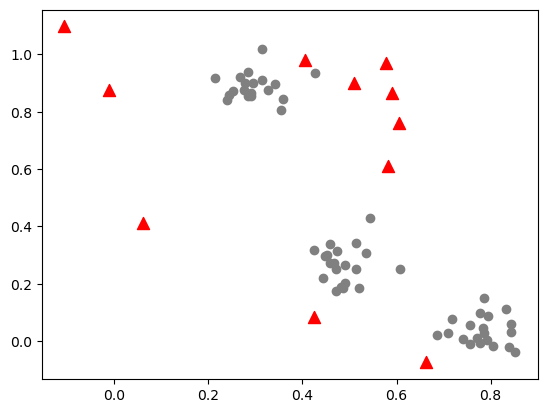

In [9]:
plt.figure()
plt.scatter(X_dbscan_toy[cluster_point_indices,0], X_dbscan_toy[cluster_point_indices,1], c='grey')
plt.scatter(X_dbscan_toy[noise_point_indices,0], X_dbscan_toy[noise_point_indices,1], c='red', marker='^', s=75)
plt.show()

Summing up, the red dots in the plots we define as noise or outliers as they are very dissimilar to the other data points. In practice, we would likely remove those noise points, treat them separately, or maybe perform additional preprocessing steps to potentially "denoise" the dataset. However, the steps of choice generally depend heavily on the exact data mining task. Here, we focus on the identification of noise points.

### 1.1 Implementing DBSCAN for Noise Detection (10 Points)

In the lecture, we covered the original algorithm of DBSCAN, which you can also find on [Wikipedia](https://en.wikipedia.org/wiki/DBSCAN). While not difficult to implement, it takes quite a couple of lines of codes to do so. For this assignment, however, we are only interested in the points of a dataset that DBSCAN considers noise (as illustrated above; the red dots in the previous plot). This includes that we do not have to care about

* how many clusters there are (the plot above hints at 3 clusters but it does not matter) *and*
* which non-noise points (the grey dots in the plot above) belong to which cluster

**Your task is to implement a modified/simplified version of DBSCAN to find all noise points in a dataset!** The skeleton of method `get_noise_dbscan()` you need to complete is found in the file `cs5228_a2.py` (before the appropriate renaming). The method takes data matrix `X` as well as the two basic parameters `eps` and `min_samples` as input parameters; we use the same naming as scikit-learn's implementation of [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html).  The output should be 2 lists of indices: (a) one containing the indices of all *core points* and (b) on containing the indices of all *noise points* in input dataset X.

**Important:**
* We only split this task into 2.1 a) and 2.1 b) to have intermediate results you can check for correctness (and potentially to better allow for partial marking). Our reference solutions first finds all core points and uses this information to find all noise points; hence the 2 separate code blocks for you to complete.
* However, if you have a better/faster/shorter/cooler/etc. solution, you are more than welcome to implement it and ignore the intermediate result of finding all core points. Only the result from 2.1 b) is important. This also means that you can ignore 2.1 a) and still get full marks if you correctly identify all noise points.
* If you have an alternative solution, please make sure that the method still returns the 2 output parameters `(core_point_indices, noise_point_indices)`. If you do not need to explicitly identify the core points, you can simply return `None` for `core_point_indices`.
* You can import any method `numpy`, `scipy`, `sklearn`, or `pandas` has to offer -- except for any ready-made implementation of DBSCAN, of course :). Please add any imports to the code cell at the top with the other imports. Hint: We already imported [`sklearn.metrics.pairwise.euclidean_distances`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.euclidean_distances.html) for you.

We will benchmark your implementation as part of our Little Competitions to see whose solution is the fastest.

#### 1.1 a) Compute Core Points (5 Points)

As mentioned above, our reference solution first computes all core points. If you follow this approach, complete the respective part in the code of method `get_noise_dbscan()`. Some hints:
* Recall that we do not care to which cluster a core point a data sample belongs, only that is a core point in *some* cluster
* Have a look at method [`sklearn.metrics.pairwise.euclidean_distances`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.euclidean_distances.html); it might make your life easier.

**Important:** Avoid using loops in the parts of the code you have to complete. If you use loops but the results are correct, there will be some minor deduction of points. Once you know what you need to do, it is almost guaranteed that `numpy`, `scipy`, or `sklearn` will provide a useful method.

In [16]:
my_core_point_indices, _ = get_noise_dbscan(X_dbscan_toy, eps=0.1, min_samples=10)

print('Total number of core points: {}\n'.format(len(my_core_point_indices)))
print('The first 25 indices of the points labeled as core points:\n{}'.format(sorted(my_core_point_indices)[:25]))

#NOTE: Added this!
print('The indices of the points labeled as core points lesser than 25:\n{}'.format(list(filter(lambda x: x<25,sorted(my_core_point_indices)))))

Total number of core points: 50

The first 25 indices of the points labeled as core points:
[1, 3, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 28, 29, 34]
The indices of the points labeled as core points lesser than 25:
[1, 3, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24]


**NOTE: In the cell below it is mentioned that the first 25 indices are provided but there are only 20 points shown, in the above code it shows the first 25 points by slicing it.**

The output of previous code cell should look like:
    
```
Total number of core points: 50

The first 25 indices of the points labeled as core points:
[1, 3, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24]
```

Note that `0`, `4`, and `27` are missing from this list since [`sklearn.cluster.DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) told us that these points are noise. Of course, also the border points are missing here, but [`sklearn.cluster.DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) does not return those explicitly.

#### 1.1 b) Compute Noise Points (5 Points)

Knowing the core points is useful but only an intermediate step. Now it is time to complete the method `get_noise_dbscan()` to compute the indices of all noise points in `X`. Again, our reference solution uses `core_point_indices` to accomplish this. If your implementation does not require the information about core points but returns the correct `noise_point_indices` then this is perfectly fine!

**Important:** Avoid using loops in the parts of the code you have to complete. If you use loops but the results are correct, there will be some minor deduction of points. Once you know what you need to do, it is almost guaranteed that `numpy`, `scipy`, or `sklearn` will provide a useful method.

In [17]:
_, my_noise_point_indices = get_noise_dbscan(X_dbscan_toy, eps=0.1, min_samples=10)

print('Total number of noise points: {}\n'.format(len(my_noise_point_indices)))
print('The indices of all points labeled as noise points:\n{}'.format(sorted(my_noise_point_indices)))

Total number of noise points: 10

The indices of all points labeled as noise points:
[0, 4, 27, 31, 33, 39, 43, 46, 51, 65]


The output of previous code cell should look like:

```
Total number of noise points: 10

The indices of all points labeled as noise points:
[0, 4, 27, 31, 33, 39, 43, 46, 51, 65]
```

Since we used the same values for `eps` and `min_samples`, this result matches the output we saw earlier when we used scikit-learn's implementation of [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) over the toy dataset.

### 1.2 Questions about DBSCAN

**1.2 a) Basic Data Understanding with DBSCAN (3 Points)**

Assume you have a dataset `X`, run DBSCAN, and get a clustering that contains a set of clusters and some noise points (there's no need to be more precise; it's only important that you don't get just noise). Let's also assume you create a new dataset `X_new` simply by shuffling `X`; no other changes. Now you run DBSCAN with the same parameters as before over `X_new` and get a different clustering, i.e., most of the clusters are not exactly the same as before.

**Describe what this information tells about the dataset and clustering!** This may include a brief discussion how changing the parameters of DBSCAN will likely affect the results.

**Your Answer:**
- Technically speaking even after shuffling we still have the same set of points so plotting each point would still give us the same spatial domain of points.
- The only difference however is that DBSCAN always gives a deterministic answer for what are the core points and what are the noise points, however each run of DBSCAN can potentially give us different border points
- The reason for this non-determinism of the border points is because the algorithm itself starts in a random manner classifies everything as noise until it finds the first core point , then it tries to build around that to classify all other points in that neighbourhood as subsequent core and border points.
- Since the order of finding a core point is random; The "exploration" from each randomly selected core point can give rise to some specific set of core points and border points suited as per that choice and whether other core points from other clusters were already found before that
- So if the order is different (while the parameters remain the same) the border points would also be different.
- Since the border points could be different on each run of DBSCAN, the cluster it traces out could also technically be different thus yielding different clusters in X_new when compared with X even with the same values of the parameters.
- That said, if the parameters of epsilon and min_neighbours are different, then the clustering result itself will be completely different as the very definition of core, noise and border points depends on the no of points available in its epsilon neighbourhood and the threshold of the min_neighbours used to classify it as a specific type of point.

**1.2 b) Finding all Cluster (2 Points)**

Your method `get_noise_dbscan()` finds all the noise points in a dataset according to the definition of DBSCAN. Now let's assume you now want to find all clusters, i.e., the number of clusters and which non-noise point belongs to which cluster.

**2.2a) Describe how the result of `get_noise_dbscan()` may help you to find all clusters! (2 Points)** There is no need to implement anything; just a brief description how clusters can be found by already knowing all noise points.

**Your Answer:**
* Using the set of core points we can essentially do something like a DFS to trace out the entire chain of all core points starting from this particular core point. Each such connected component can be assigned to a specific cluster id
* Once we have assigned all the core points to specific clusters by finding all the separate connected components, we can also start a similar process by finding the linkage of all the border points in a particular cluster ( i.e pick one border point around any core point, and use DFS again with that starting point to find out the chain of border points around core points belonging to cluster with id say 'x'. Once we find that linkage/connected component we can assign all of those border points also to the same cluster id.)
* This way we will have different clusters where each of the core and border point is assigned to a specific cluster id.
* All the identified noise points are going to be ignored as noise points technically don't belong to any cluster by definition.


## 2 AGNES

AGNES, which stands for Agglomerative Nesting, is an agglomerative hierarchical clustering algorithm used in data analysis and machine learning. It is a bottom-up approach to clustering, meaning it starts with individual data points as separate clusters and iteratively merges them into larger clusters. Here's an overview of how the AGNES clustering algorithm works:

* **Initialization:** Initially, each data point is treated as a single cluster, resulting in as many clusters as there are data points.

* **Agglomerative Process:** AGNES proceeds by iteratively merging the two closest clusters into a single larger cluster. The distance between clusters is typically determined by a linkage criterion, which can be one of the following commonly used methods: *Single Linkage*, *Complete Linkage*, *Average Linkage*, and more.

* **Hierarchy Building:** As clusters are merged, a hierarchy or dendrogram is built to represent the sequence of cluster mergers. This dendrogram can be used to visualize the hierarchical structure of the data and choose the desired number of clusters later.

* **Stopping Criterion:** AGNES continues merging clusters until a stopping criterion is met. This criterion could be based on a predetermined number of clusters, a threshold distance, or other criteria. By default, AGNES stops when all data points form a single cluster.

* **Result:** The output of AGNES is a hierarchical tree-like structure called a dendrogram, which can be cut at a specific level to obtain a partition of the data into clusters. The choice of where to cut the dendrogram depends on the desired number of clusters.

AGNES is a valuable tool for hierarchical clustering and can be useful in various data analysis tasks, including taxonomy construction, gene expression analysis, and image segmentation.

### 2.1 Interpreting Dendrograms

We saw in the lecture that dendrograms are a meaningful way to visualize the hierarchical relationships between the data points with respect to the clustering using AGNES (or any other hierarchical clustering technique). Properly interpreting is important to get a correct understanding of the underlying data.

Below are the plots of 6 different datasets labeled A-F. Each dataset contains 30 data points, each with two dimensions.

<img src="data/a2-agnes-data-labeled.png">

Below are 6 dendrograms labeled 1-6. These dendrograms show the clustering using **AGNES with Single Linkage** for the 6 dataset above, but in a random order.

<img src="data/a2-agnes-dendrogram-labeled.png">

**Find the correct combinations of datasets and dendrograms** -- that is, find for each dataset the dendrogram that visualizes the clustering using AGNES with Single Linkage! Give a brief explanation for each decision; max 1-2 sentences! Complete the table below!

| Dataset | Dendrogram | Brief Explanation |
| ---  |------------|---------------------------------------------------------------------------------------------------------------------------------------|
| **A**    | 6          | Here we can clearly see there is one blob and 2 outlier points. Therefore it follows that the 2 outlier points would be merged in the last two steps which corresponds to this particular dendogram|
| **B**    | 1          | If we draw one line conected all points its like an outgrowing spiral starting from the dense region to the not so dense point in the bottom left. So each point can only be merged with one other point at each step which corresponds to this particular dendogram |
| **C**    | 5          | Each point in the circumference of this cluster eventually becomess linked as 1 cluster as those points are all close to each other but the order of merging is slightly different due to the change in densities along the circumference. However the center of the cirle is the furthest away from each point on the circumference so that gets merged in the end. |
| **D**    | 3          | Each of those half crescents form one cluster and then they are grouped together in the end. Because of the nature of the crescent each point is closer to another point so each point in the crescent gets paired up consecutively|
| **E**    | 2          | All points here are randomly distributed so it follows that even the dendogram shows uniform merging at each level|
| **F**    | 4          | There are naturally 3 clusters. In each cluster the points get merged together first and then each of those clusters are merged. This dendogram also has 3 groups which are then merged together in order |

### 2.2 Questions about AGNES (4 Points)

**2.2 a) Picking the Right Linkage Method (2 Points)**

Assume your dataset contains the geolocations of traffic accidents on Singapore expressways over the time span of a year. Using AGNES, we want to find sections of the expressways where traffic accidents are particularly common.

**Which Linkage Methods covered in the lecture is most suitable for this task?** Briefly explain your choice!


**Your Answer:**
- Single Linkage is more apt here as accidents which happen on roads typically occur closer together due to the nature of how the road curves/bends etc. So this way by merging together points which are very close to each other it can very clearly define which exact sections the accidents are most likely to happen.
- However, if there are outlier datapoints it may consider those points as a part of the cluster as well as single linkage is highly sensitive to noise. Therefore, in such scenarios it's probably better to use other linkage methods using AGNES and then evaluate all of them together as those linkage methods are very robust when dealing with noise (e.g. Complete & Average).

**2.2 b) Outlier Detection with AGNES (2 Points)**

In contrast to DBSCAN, AGNES has no explicit concept of noise points for outlier detection. But an AGNES clustering still gives meaningful insights into a dataset.

**How can the results of AGNES be used to identify outliers in a data?** Briefly explain your answer!

**Your Answer:**

- Similar to question 2.1 , we can draw the dendograms using any linkage method and infer the outliers from that diagram as the outlier points would typically be singleton clusters which would be merged at the very end as other closer points/clusters gets merged together first.
- Along similar lines we can consider a dendogram height threshold as the vertical axis represents distance between clusters. By setting a threshold at a specific height, we can say that points of clusters that merge at a height beyond this are considered as outliers.
- Another method using the dendogram would be to analyze the number of nodes in a subtree. Outliers may be found in branches that have fewer data points or where clusters merge at later/higher levels.

## 3 Association Rule Mining

Association rule mining is a data mining technique used to discover interesting relationships, patterns, or associations in large datasets. It primarily focuses on identifying frequent patterns, often in the form of rules, within transactional or relational databases. This technique is commonly applied in various fields, including market basket analysis in retail, web usage mining, healthcare, and more. Here's how association rule mining works:

* **Transaction Data:** Association rule mining typically starts with a dataset that represents transactions or events. Each transaction consists of a set of items, and these transactions are often stored in a database.

* **Itemsets:** An itemset is a collection of one or more items or attributes from the dataset. For example, in a retail context, an itemset could be a list of products purchased together in a single transaction.

* **Support:** Support is a measure of the frequency with which an itemset appears in the dataset. It is defined as the proportion of transactions that contain the itemset. High support indicates that the itemset is a common pattern in the data.

* **Confidence:** Confidence is a measure of how often the rule is found to be true. It is defined as the proportion of transactions that contain both the antecedent and the consequent. High confidence suggests a strong association between the antecedent and consequent.

* **Lift:** Lift is a measure of how much more likely the consequent is given the antecedent compared to its expected occurrence by chance. A lift value greater than 1 suggests a positive association, while a value less than 1 suggests a negative or weak association.

* **Association Rules:** Association rules are typically expressed as "if-then" statements. They describe relationships between itemsets. Each rule consists of two parts:
    * Antecedent (Left-hand side, LHS): This is the itemset that represents the condition or premise of the rule.
    * Consequent (Right-hand side, RHS): This is the itemset that represents the result or conclusion of the rule.

The association rule mining process involves finding itemsets that meet a minimum support threshold and then generating rules based on those itemsets. Rules are evaluated based on their confidence and lift, and interesting or meaningful rules are selected for further analysis or action. For example, in a retail context, association rule mining might reveal that customers who purchase items like bread and milk (antecedent) are highly likely to also purchase butter (consequent). This insight can be valuable for marketing and inventory management, as it suggests items that can be promoted together or placed in close proximity in the store. Association rule mining algorithms, such as the Apriori algorithm, are commonly used to efficiently discover and analyze these patterns in large datasets.

#### Toy Dataset

The following dataset with 5 transactions and 6 different items is directly taken from the lecture slides. This should make it easier to test your implementation. The format is a list of tuples, where each tuple represents the set of items of an individual transaction. This format can also be used as input for the `efficient-apriori` package.

In [3]:
transactions_demo = [
    ('bread', 'yogurt'),
    ('bread', 'milk', 'cereal', 'eggs'),
    ('yogurt', 'milk', 'cereal', 'cheese'),
    ('bread', 'yogurt', 'milk', 'cereal'),
    ('bread', 'yogurt', 'milk', 'cheese')
]

#### Auxiliary Methods

We want you to focus on the Apriori algorithm. So we provide you with a set of auxiliary functions. Feel free to look at their implementation in the file `data/utils.py`.

Given a set of items, `powerset()` returns all possible subsets of items with a specified minimum and maximum length. For example, you can use this method to generate all itemsets for a transaction.

In [4]:
for subset in powerset(('c', 'b', 'a'), min_len=1, max_len=3):
    print(subset)

('a',)
('b',)
('c',)
('a', 'b')
('a', 'c')
('b', 'c')
('a', 'b', 'c')


The method `unique_items()` returns all the unique items across all transactions.

In [5]:
unique_items(transactions_demo)

{'bread', 'cereal', 'cheese', 'eggs', 'milk', 'yogurt'}

The method `support()` calculates and returns the support for a given itemset and set of transactions.

In [6]:
support(transactions_demo, ('bread', 'milk'))

0.6

The method `confidence()` calculates and returns the confidence for a given association rules and set of transactions. An association rule is represented by a 2-tuple, where the first element represents itemset X and the second element represents items Y (i.e., $X \Rightarrow Y$)

In [7]:
confidence(transactions_demo, (('bread',), ('milk',)))

0.75

The method `generate_association_rules()` calculates and returns all possible association rules given an itemset. The result is a list of association rules, each association rule represented as 2-tuple (see above).

In [8]:
generate_association_rules(('bread', 'milk', 'cereal'))

[(('bread',), ('cereal', 'milk')),
 (('cereal',), ('bread', 'milk')),
 (('milk',), ('bread', 'cereal')),
 (('bread', 'cereal'), ('milk',)),
 (('bread', 'milk'), ('cereal',)),
 (('cereal', 'milk'), ('bread',))]

The method `merge_itemsets()` merges two given itemsets into one itemset.

In [9]:
merge_itemsets(('bread', 'milk'), ('bread', 'eggs'))

('bread', 'eggs', 'milk')

For your implementation, you can make use of these auxiliary methods wherever you see fit. And that is, of course, strongly recommended, as it makes the programming task much easier. So, let's get started.

### 3.1 Brute-Forcing Association Rule Mining (5 Points)

The most naive approach for mining association rules would be to generate all possible rules and check if their support and confidence exceed the specified thresholds `minsup` and `minconf`. In the lecture, you have learned that, given $d$ unique items in a dataset of transactions, there are $3^d - 2^{d+1} + 1$ possible rules.

**Proof that $d$ unique items result in $3^d - 2^{d+1} + 1$ possible rules!** (Hint: Write out all possible rules for $d = 2, 3, 4, ...$ items; you should quickly spot the pattern that will allow you to validate the formula).

**Your Answer:**

**This was covered in the tutorials, so as mentioned by Prof I am attempting the two extra questions in the "cs5228_a2_extra_ParasharaRamesh_e1216292.ipynb" instead!**

### 3.2 Implementing Apriori Algorithm for Finding Frequent Itemsets (10 Points)

The underlying goal of the Apriori algorithm is to avoid calculating the support of itemsets for which we can say ahead of time (i.e., "a-priori") that they cannot be frequent itemsets. Calculating the support is the most expensive part as it requires going through all transactions in our database.

In the following task, you will implement the Apriori algorithm for finding Frequent Itemsets. In more detail, you will implement the $F_{k-1}\times F_1$ method to compute the $L_k$ candidate itemsets given the $F_{k-1}$ frequent itemsets and the $F_1$ frequent itemsets.

#### 3.2 a) Generating Candidate Itemsets $L_{k}$ (5 Points)

The $F_{k-1}\times F_1$ method used the frequent itemset sets of size ($k-1$) and of size $1$ to derive the set $L_k$ of candidate itemsets. The important part is the pruning, e.g., the removal of all k-itemset for which we can already tell that they won't have sufficient support.

**Hint:** Instead of first creating all possible k-itemsets and then performing the pruning to yield the final set $L_k$, check each k-itemset immediately in the loop if it should indeed be added to $L_k$ or not. This will make your code a bit simpler.

In [10]:
#NOTE: Didn't use any of the existing helper functions
def generate_Lk(k_minus_one_itemsets, one_itemsets):
    # Initialize as set to avoid duplicates
    Lk = set()

    #NOTE: Typecasting each itemset to a list of sets instead as we can use the "in" operator to search in a list of sets as opposed to a set of tuples with any ordering of the set we are searching for
    k_minus_one_itemsets = list(map(lambda item_tuple: set(item_tuple), k_minus_one_itemsets))
    one_itemsets = list(map(lambda item_tuple: set(item_tuple), one_itemsets))

    # Nested loop over both itemsets to find all combinations
    for k_minus_one_itemset in k_minus_one_itemsets:
        for one_itemset in one_itemsets:

            ##########################################################################################
            ### Your code starts here ###############################################################

            #1. converting it into a list as each itemset is currently a set ( this is only so that I can do step #3)
            k_minus_one_itemset = list(k_minus_one_itemset)
            one_itemset = list(one_itemset)

            #2. make a candidate lk which can be potentially added to Lk
            #NOTE. only a frozen set can be added to a set, as only a frozenset is hashable!
            candidate_lk = frozenset(k_minus_one_itemset + one_itemset)

            if len(candidate_lk) == len(k_minus_one_itemset) + 1:
                #2.a continue only if the set you formed actually has k elements in it
                can_add_candidate_to_lk = True

                for i in range(len(k_minus_one_itemset)):
                    #3. consider each k-1 combo
                    possible_k_minus_one_combo_to_check = frozenset(
                        k_minus_one_itemset[:i] + k_minus_one_itemset[i + 1:] + one_itemset
                    )

                    #4. check if each k-1 combo is already present in k-1 frequent itemsets
                    #NOTE: in operator works only because k-1 frequent itemsets is a list of sets and searching
                    if possible_k_minus_one_combo_to_check not in k_minus_one_itemsets:
                        #5. if it is not present make the flag false , break and don't consider this candidate_lk itemset
                        can_add_candidate_to_lk = False
                        break

                if can_add_candidate_to_lk:
                    #6. add candidate only if all of its k-1 combos are present in the frequent itemset
                    #NOTE. add works here because we are adding a frozenset which ensures that other combinations cant be added
                    Lk.add(candidate_lk)

    #7. typecast all frozensets back to tuple in a set comprehension
    Lk = {tuple(lk) for lk in Lk}

            ### Your code ends here #################################################################
            #########################################################################################                  

    return Lk

For testing your implementation, we manually crafted a k-itemset ($k=2$) and 1-itemset in line with the lecture example, meaning that the result should match the example on the lecture slides as well.

In [11]:
k_minus_one_itemsets = {
    ('bread', 'cereal'), ('bread', 'milk'), ('bread', 'yogurt'), ('cereal', 'milk'),
    ('cereal', 'yogurt'), ('cheese', 'milk'), ('cheese', 'yogurt'), ('milk', 'yogurt')
}

one_itemsets = {('bread',), ('cereal',), ('cheese',), ('milk',), ('yogurt',)}

Lk = generate_Lk(k_minus_one_itemsets, one_itemsets)

for itemset in Lk:
    print(itemset)

('milk', 'yogurt', 'cheese')
('milk', 'bread', 'yogurt')
('milk', 'cereal', 'yogurt')
('milk', 'cereal', 'bread')
('cereal', 'bread', 'yogurt')


#### 3.2 b) Generating Frequent Itemsets $F_{1}$, $F_{2}$, $F_{3}$, ... (5 Points)

Once we have a candidate set L of a given iteration, we can directly derive the frequent itemsets by removing all candidates with insufficient support. As this is a trivial filter step, we give you this method `generate_F` for free.

In [12]:
def generate_Fk(Lk, transactions, minsup):
    return set([ s for s in Lk if support(transactions, s) >= minsup])

In [13]:
Fk = generate_Fk(Lk, transactions_demo, 0.4)

for itemset in Fk:
    print(itemset)

('milk', 'yogurt', 'cheese')
('milk', 'bread', 'yogurt')
('milk', 'cereal', 'yogurt')
('milk', 'cereal', 'bread')


**Note:** Just as a quick reminder, this filter step is actually the most costly part of the algorithms since we have to calculate the support for each candidate itemset which requires us to go through each transaction. For our toy dataset, this doesn't really matter, but the whole goal of the Apriori algorithm is to minimize the number of access to the datasets.

With the 2 methods `generate_L_kplus1` and `generate_F`, you now have everything to find all frequent itemsets using the Apriori algorithm. To this end, complete the method `find_frequent_itemsets_apriori` below!

In [27]:
def find_frequent_itemsets_apriori(transactions, minsup):
    # The 1-itemsets are just all unique items across all transactions
    # NOTE: Renaming this variable for my readability
    all_one_itemsets = unique_items(transactions)

    ############################################################################################
    ### Your code starts here ##################################################################

    # Initialize dictionary with all current frequent itemsets for each size k
    # Example format: { 1: {(a), (b), (c)}, 2: {(a, c), ...} }

    # initializing with F1
    all_one_itemsets = {(item,) for item in all_one_itemsets} #making it a set of tuples so that it can be fed into the next function!
    Fk = generate_Fk(all_one_itemsets, transactions, minsup)
    F = {1: copy.deepcopy(Fk)}

    ### Your code ends here ####################################################################
    ############################################################################################

    # NOTE: changed the for loop upper bound to len(all_one_itemsets) instead of len(one_itemsets) so that there are no side effects when using the function!
    for k in range(2, len(all_one_itemsets) + 1):
        # NOTE: Commenting this out as I just use the previous iteration's Fk as the new Fk for this iteration
        # Fk = set()

        ########################################################################################
        ### Your code starts here ##############################################################

        Lk = generate_Lk(Fk, F[1])
        Fk = generate_Fk(Lk, transactions, minsup)

        if len(Fk) == 0:
            # we can stop here
            break
        ### Your code ends here ################################################################
        ########################################################################################

        F[k] = Fk

    #NOTE: printing F as that is easier for debugging
    # print(F)

    # Merge the dictionary of k-itemsets to a single set and return it
    # Example: {1: {(a), (b), (c)}, 2: (a, c)} => {(a), (b), (c), (a, c)}
    return set.union(*[itemsets for k, itemsets in F.items()])

Let's test your implementation using the code cell below. Of course, the result should match the brute force approach (assuming the same value for input parameter `minsup`; default: `0.4` to match the example in the lecture).

In [22]:
F = find_frequent_itemsets_apriori(transactions_demo, 0.4)

print("-"*150)
print("Itemsets are")
for itemset in F:
    print(itemset)


{1: {('yogurt',), ('cheese',), ('bread',), ('cereal',), ('milk',)}, 2: {('milk', 'yogurt'), ('milk', 'cheese'), ('bread', 'yogurt'), ('milk', 'bread'), ('yogurt', 'cheese'), ('cereal', 'yogurt'), ('milk', 'cereal'), ('cereal', 'bread')}, 3: {('milk', 'yogurt', 'cheese'), ('milk', 'bread', 'yogurt'), ('milk', 'cereal', 'yogurt'), ('milk', 'cereal', 'bread')}}
------------------------------------------------------------------------------------------------------------------------------------------------------
Itemsets are
('milk', 'yogurt', 'cheese')
('milk', 'bread', 'yogurt')
('milk', 'cereal', 'yogurt')
('yogurt',)
('cheese',)
('milk', 'yogurt')
('milk', 'cheese')
('milk', 'cereal', 'bread')
('bread', 'yogurt')
('bread',)
('milk', 'bread')
('yogurt', 'cheese')
('cereal', 'yogurt')
('cereal',)
('milk', 'cereal')
('milk',)
('cereal', 'bread')


#### From Frequent Itemsets to Association Rules

Your implementation so far gives you the Frequent Itemsets in a list of transactions using the Apriori method. This step is typically the most time-consuming one in Association Rule Mining. However, we still have to do the second step and find all Association Rules given the Frequent Itemsets. We saw in the lecture that this can also be done in an efficient manner using the Apriori method to avoid checking all rules.

Since this step is typically less computationally expensive, we simply do it the naive way -- that is, we go over all Frequent Itemsets, and check for Frequent Itemset and check which of the Association Rules that can be generated from it has a sufficiently high confidence. With all the auxiliary methods we provide, this becomes trivial to implement, so we simply give you the method `find_association_rules()` below. Note how it uses your implementation of `frequent_itemsets_apriori()`.

In [31]:
def find_association_rules(transactions, min_support, min_confidence):
    # Initialize empty list of association rules
    association_rules = []
    
    # Find and loop over all frequent itemsets
    for itemset in find_frequent_itemsets_apriori(transactions, min_support):
        if len(itemset) == 1:
            continue

        # Find and loop over all association rules that can be generated from the itemset
        for r in generate_association_rules(itemset):
            # Check if the association rule fulfils the confidence requriement
            if confidence(transactions, r) >= min_confidence:
                association_rules.append(r)
                
    # Return final list of association rules
    return association_rules

find_association_rules(transactions_demo, 0.6, 1.0)

[(('cereal',), ('milk',))]

If everything is correct, for the default values for `min_support` and `min_confidence`, the one Association Rules that should be returned is $\{cereal\}\Rightarrow \{milk\}$ (in Python represented as a tuple of 2 tuples, left-hand side and right-hand side).

#### Comparison with `efficient-apriori` package

You can run the apriori algorithm over the demo data to check if your implementation is correct. Try different values for the parameters `min_support` and `min_confidence` and compare the results. Note that the order of the returned association rules might differ between your implementation and the apriori one.

In [33]:
#NOTE: also capturing itemsets for comparision
itemsets, rules = apriori(transactions_demo, min_support=0.6, min_confidence=1.0, max_length=4)

#NOTE: printing itemsets as well
print("Itemsets are:")
print(itemsets)
print("-"* 160)
print("Rules are:")
for r in rules:
    print('Rule [{} => {}] (support: {}, confidence: {}, lift: {})'.format(r.lhs, r.rhs, r.support, r.confidence, r.lift))

Itemsets are:
{1: {('bread',): 4, ('yogurt',): 4, ('milk',): 4, ('cereal',): 3}, 2: {('bread', 'milk'): 3, ('bread', 'yogurt'): 3, ('cereal', 'milk'): 3, ('milk', 'yogurt'): 3}}
----------------------------------------------------------------------------------------------------------------------------------------------------------------
Rules are:
Rule [('cereal',) => ('milk',)] (support: 0.6, confidence: 1.0, lift: 1.25)


### 3.3 Association Rule Mining over Real-World Datasets

For the last task, we look into real-world datasets to find interesting Association Rules. As those datasets are already quite large -- although not really large -- we only rely only on the `efficient-apriori` package for performance reasons. To make things even easier for you, we provide the method `show_top_rules` which computes the Association Rules using the `efficient-apriori` package, but (a) filters the rules w.r.t. to the right-hand side (optional), (b) sorts the rules w.r.t. the specified metric, and (c) shows only the top-k rules.

#### Loading the Data

For the first dataset, we consider a typical [Market Basket Analysis](https://www.kaggle.com/yugagrawal95/market-basket-analysis-apriori-in-python/data?select=Market_Basket_Optimisation.csv) dataset containing the set of items people have purchased in a supermarket. This dataset is very similar to the running example used throughout the lecture -- well, just larger :), with ~7,500 transactions.

In [66]:
transactions_groceries = []

with open('data/a2-groceries.csv') as file:
    for line in file:
        line = line.strip()
        transactions_groceries.append(line.split(','))

print('Number of transactions overall: {}'.format(len(transactions_groceries)))
print()
print('Some example transactions:')
for t in transactions_groceries[:5]:
    print(t)

Number of transactions overall: 7501

Some example transactions:
['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil']
['burgers', 'meatballs', 'eggs']
['chutney']
['turkey', 'avocado']
['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea']


As the second dataset, use the [Coronavirus Disease 2019 (COVID-19) Clinical Data Repository](https://covidclinicaldata.org/) to find Association Rules that might tell as, which symptoms are most indicative of a COVID-19 infections. We already downloaded, cleaned, and prepared the dataset for you. The dataset file `data/a1-covid-symptoms-result.csv` contains over 710k transactions. Each transaction is a set of $0..n$ symptoms and $1$ test result label ("POSITIVE" and "NEGATIVE"). For example a line in the file can look like `runny_nose sore_throat fatigue POSITIVE`. Note that a line might also be just `NEGATIVE` or `POSITIVE` in case a person was tested without any symptoms. Feel free to take a look at the file -- looking at the raw data is always a good first step when it comes to data mining.

Note that we generate 2 lists of transactions which we both use later:
* `transactions_covid_all` contains all 710k+ transactions in the dataset
* `transactions_covid_pos` contains all 11k+ transactions with a "POSITIVE" test result label

In [67]:
transactions_covid_all = []
transactions_covid_pos = []

vocab = set()

with open('data/a2-covid-symptoms-result.csv') as file:
    for line in file:
        line = line.strip()
        
        if 'POSITIVE' in line:
            transactions_covid_pos.append(line.split(' '))
        
        transactions_covid_all.append(line.split(' '))

print('Number of transactions overall: {}'.format(len(transactions_covid_all)))
print('Number of "POSITIVE" transactions: {}'.format(len(transactions_covid_pos)))
print()
print('Some example transactions:')
for t in transactions_covid_pos[:5]:
    print(t)

Number of transactions overall: 710350
Number of "POSITIVE" transactions: 11060

Some example transactions:
['muscle_sore', 'fever', 'fatigue', 'POSITIVE']
['loss_of_smell', 'loss_of_taste', 'muscle_sore', 'fever', 'fatigue', 'headache', 'POSITIVE']
['cough', 'sore_throat', 'fever', 'sob', 'fatigue', 'POSITIVE']
['POSITIVE']
['POSITIVE']


#### Finding Association Rules

Now that we have the data, we can try to find interesting Association Rules in both datasets. To this end, we have prepared a series of code cells to run the Apriori Algorithm implemented by the `efficient-apriori` package over both datasets with different parameters. Each run is labeled A-D; the question at the may make references to some of these individual runs.

**Note:** There is nothing for you to implement here, you can just run the code cells! However, for the questions below, you can always change the different parameters (e.g., `min_support`, `min_confidence`) to see their effects in the result as well as the runtime.

In [36]:
%%time
# Run A
show_top_rules(transactions_covid_all, min_support=0.001, min_confidence=0.2, k=5, sort='lift', rhs='POSITIVE')

=== Total Number of Rules: 8861 | Number of rules with matching RHS: 4 ===
('loss_of_smell', 'loss_of_taste') => ('POSITIVE',): supp: 0.001, conf: 0.296, lift: 19.016
('loss_of_smell',) => ('POSITIVE',): supp: 0.002, conf: 0.224, lift: 14.389
('cough', 'fever', 'headache') => ('POSITIVE',): supp: 0.001, conf: 0.205, lift: 13.149
('loss_of_taste',) => ('POSITIVE',): supp: 0.002, conf: 0.200, lift: 12.866

CPU times: total: 1.2 s
Wall time: 5.19 s


In [37]:
%%time
# Run B
show_top_rules(transactions_covid_pos, min_support=0.15, min_confidence=0.8, k=5, sort='lift', rhs='POSITIVE')

=== Total Number of Rules: 6 | Number of rules with matching RHS: 6 ===
('cough',) => ('POSITIVE',): supp: 0.323, conf: 1.000, lift: 1.000
('fatigue',) => ('POSITIVE',): supp: 0.195, conf: 1.000, lift: 1.000
('fever',) => ('POSITIVE',): supp: 0.200, conf: 1.000, lift: 1.000
('headache',) => ('POSITIVE',): supp: 0.240, conf: 1.000, lift: 1.000
('muscle_sore',) => ('POSITIVE',): supp: 0.193, conf: 1.000, lift: 1.000
('sore_throat',) => ('POSITIVE',): supp: 0.174, conf: 1.000, lift: 1.000

CPU times: total: 0 ns
Wall time: 15.7 ms


In [38]:
%%time
# Run C
show_top_rules(transactions_groceries, min_support=0.001, min_confidence=0.2, k=5, sort='lift')

=== Total Number of Rules: 9434 | Number of rules with matching RHS: 9434 ===
('french fries', 'pasta') => ('escalope', 'mushroom cream sauce'): supp: 0.001, conf: 0.348, lift: 60.675
('mineral water', 'pasta') => ('eggs', 'shrimp'): supp: 0.001, conf: 0.625, lift: 44.228
('french fries', 'mushroom cream sauce') => ('escalope', 'pasta'): supp: 0.001, conf: 0.229, lift: 38.966
('escalope', 'french fries', 'pasta') => ('mushroom cream sauce',): supp: 0.001, conf: 0.667, lift: 34.970
('escalope', 'french fries', 'mushroom cream sauce') => ('pasta',): supp: 0.001, conf: 0.533, lift: 33.903
('fresh tuna', 'honey') => ('fromage blanc',): supp: 0.002, conf: 0.400, lift: 29.416

CPU times: total: 188 ms
Wall time: 741 ms


In [39]:
%%time
# Run D
show_top_rules(transactions_groceries, min_support=0.01, min_confidence=0.2, k=5, sort='lift')

=== Total Number of Rules: 163 | Number of rules with matching RHS: 163 ===
('herb & pepper',) => ('ground beef',): supp: 0.016, conf: 0.323, lift: 3.292
('mineral water', 'spaghetti') => ('ground beef',): supp: 0.017, conf: 0.286, lift: 2.908
('tomatoes',) => ('frozen vegetables',): supp: 0.016, conf: 0.236, lift: 2.474
('shrimp',) => ('frozen vegetables',): supp: 0.017, conf: 0.233, lift: 2.447
('milk', 'mineral water') => ('frozen vegetables',): supp: 0.011, conf: 0.231, lift: 2.419
('ground beef', 'mineral water') => ('spaghetti',): supp: 0.017, conf: 0.417, lift: 2.395

CPU times: total: 0 ns
Wall time: 46.9 ms


#### My Experiments tweaking the parameters a bit


In [68]:
%%time
#Run E
# inc min support only
show_top_rules(transactions_covid_all, min_support=0.1, min_confidence=0.2, k=5, sort='lift')

=== Total Number of Rules: 0 | Number of rules with matching RHS: 0 ===

CPU times: total: 93.8 ms
Wall time: 221 ms


In [69]:
%%time
#Run F
# inc min support only with rhs as positive with rhs as positive
show_top_rules(transactions_covid_all, min_support=0.1, min_confidence=0.2, k=5, sort='lift', rhs='POSITIVE')

=== Total Number of Rules: 0 | Number of rules with matching RHS: 0 ===

CPU times: total: 31.2 ms
Wall time: 195 ms


In [59]:
%%time
#Run G
# inc min confidence only
show_top_rules(transactions_covid_all, min_support=0.001, min_confidence=0.6, k=5, sort='lift')

=== Total Number of Rules: 1941 | Number of rules with matching RHS: 1941 ===
('POSITIVE', 'loss_of_taste') => ('loss_of_smell',): supp: 0.001, conf: 0.772, lift: 88.984
('POSITIVE', 'loss_of_smell') => ('loss_of_taste',): supp: 0.001, conf: 0.710, lift: 79.566
('cough', 'headache', 'loss_of_smell') => ('loss_of_taste',): supp: 0.001, conf: 0.648, lift: 72.635
('fatigue', 'headache', 'loss_of_smell', 'muscle_sore') => ('loss_of_taste',): supp: 0.001, conf: 0.636, lift: 71.214
('loss_of_taste', 'runny_nose') => ('loss_of_smell',): supp: 0.001, conf: 0.608, lift: 70.162
('fatigue', 'loss_of_smell', 'sore_throat') => ('loss_of_taste',): supp: 0.001, conf: 0.623, lift: 69.811

CPU times: total: 1.7 s
Wall time: 5 s


In [70]:
%%time
#Run H
# inc min confidence only with rhs as positive
show_top_rules(transactions_covid_all, min_support=0.001, min_confidence=0.6, k=5, sort='lift',rhs = 'POSITIVE')

=== Total Number of Rules: 1941 | Number of rules with matching RHS: 0 ===

CPU times: total: 1.77 s
Wall time: 4.51 s


In [71]:
%%time
#Run I
# inc both
show_top_rules(transactions_covid_all, min_support=0.1, min_confidence=0.6, k=5, sort='lift')

=== Total Number of Rules: 0 | Number of rules with matching RHS: 0 ===

CPU times: total: 46.9 ms
Wall time: 204 ms


In [72]:
%%time
#Run J
# inc both with rhs as POSITIVE
show_top_rules(transactions_covid_all, min_support=0.1, min_confidence=0.6, k=5, sort='lift', rhs='POSITIVE')

=== Total Number of Rules: 0 | Number of rules with matching RHS: 0 ===

CPU times: total: 31.2 ms
Wall time: 196 ms


In [73]:
%%time
#Run K
# dec min support with rhs as positive
show_top_rules(transactions_covid_all, min_support=0.000001, min_confidence=0.2, k=5, sort='lift', rhs='POSITIVE')

=== Total Number of Rules: 174357 | Number of rules with matching RHS: 1190 ===
('cough', 'fever', 'headache', 'loss_of_smell', 'loss_of_taste', 'runny_nose') => ('POSITIVE',): supp: 0.000, conf: 0.526, lift: 33.804
('cough', 'fever', 'loss_of_smell', 'loss_of_taste', 'sore_throat') => ('POSITIVE',): supp: 0.000, conf: 0.500, lift: 32.113
('cough', 'fever', 'headache', 'loss_of_smell', 'loss_of_taste', 'sore_throat') => ('POSITIVE',): supp: 0.000, conf: 0.481, lift: 30.924
('cough', 'fever', 'loss_of_smell', 'loss_of_taste', 'runny_nose') => ('POSITIVE',): supp: 0.000, conf: 0.478, lift: 30.717
('cough', 'fever', 'loss_of_smell', 'loss_of_taste', 'muscle_sore', 'runny_nose') => ('POSITIVE',): supp: 0.000, conf: 0.474, lift: 30.423
('cough', 'fever', 'loss_of_smell', 'loss_of_taste', 'runny_nose', 'sore_throat') => ('POSITIVE',): supp: 0.000, conf: 0.474, lift: 30.423

CPU times: total: 8.42 s
Wall time: 18.8 s


In [74]:
%%time
#Run L
# dec min confidence with rhs as positive
show_top_rules(transactions_covid_all, min_support=0.001, min_confidence=0.02, k=5, sort='lift', rhs='POSITIVE')

=== Total Number of Rules: 18359 | Number of rules with matching RHS: 35 ===
('loss_of_smell', 'loss_of_taste') => ('POSITIVE',): supp: 0.001, conf: 0.296, lift: 19.016
('loss_of_smell',) => ('POSITIVE',): supp: 0.002, conf: 0.224, lift: 14.389
('cough', 'fever', 'headache') => ('POSITIVE',): supp: 0.001, conf: 0.205, lift: 13.149
('loss_of_taste',) => ('POSITIVE',): supp: 0.002, conf: 0.200, lift: 12.866
('cough', 'fever') => ('POSITIVE',): supp: 0.002, conf: 0.171, lift: 10.968
('fever', 'muscle_sore') => ('POSITIVE',): supp: 0.001, conf: 0.130, lift: 8.332

CPU times: total: 1.75 s
Wall time: 4.41 s


### Questions

**Question 3.3 a) (3 Points)** From your observation, what are the effects of increasing/reducing `min_support` and `min_confidence`? Support your answer with evidence. You can perform more runs of efficient-apriori with different parameter settings, if needed.

**Your Answer:**

- The runs from E -> L are custom runs which I used to verify my hypothesis on what happens when changing the min_support and min_confidence values
1. **Min Support:**
- **Increasing min_support:**
    + On increasing the min_support threshold, only the itemsets which occur more frequently in the dataset are to be considered for association rules. As a result, fewer rules are obtained as only the most frequent itemsets will meet this criterion.
    + e.g. Runs E & F actually show no results as none of the itemsets even meet this min support threshold
    + Generally speaking, the rules which have higher support are more reliable as we are considering only the most frequently occuring itemsets as some of the infrequent itemsets could also be just noise.
- **Decreasing min_support:**
    + Along similar lines, decreasing the min_support allows for the discovery of a large number of rules.
    + e.g. Run K shows that the total of number of rules has considerably increased when compared with Run A
    + Generally speaking, some of the rules having low support may indicate that they are based on infrequent patterns and might not be as reliable.

2. **Min Confidence:**
- **Increasing min_confidence:**
    + Increasing min_confidence filters out rules with lower confidence, ensuring that only strong associations are considered. This results in fewer rules, but they are more trustworthy. (e.g. Runs G & H)
    + Rules with higher confidence are more predictive, indicating a stronger relationship between the antecedent (LHS) and consequent (RHS) items.
    + Higher min_confidence reduces the likelihood of including spurious rules that might occur due to random chance

- **Decreasing min_confidence:**
    + Lowering min_confidence allows for the discovery of a larger number of rules, even if they have lower confidence. This can be useful for exploring weaker but potentially interesting associations.
    + e.g. Run L

- **Conclusion:**
    + In summary, adjusting min_support and min_confidence allows you to control the number and quality of the discovered association rules. Increasing these thresholds results in fewer but more reliable rules, while reducing them produces more "interesting" rules, including potentially weaker associations.



**Question 3.3 b) (3 Points)** Runs A and B return association rules with symptoms on the left-hand side and a POSITIVE test result on the right-hand side. As such both runs find rules which (combination of) symptoms are most indicative of a positive test result. However, the results of Run A and B are rather different. Explain the differences and discuss which result provides more reliable insights!

**Your Answer:**
- Runs A & B both use different datasets and also have different thresholds for min_support and min_confidence. Let us look at the differences below
- **Run A:**
    + Uses the larger dataset with both positive and negative cases. (transactions_covid_all)
    + Lower minimum support (0.001) and lower minimum confidence (0.2) thresholds.
    + Generates more rules, including potentially weaker associations.
    + Insights can be broader but potentially less reliable due to lower confidence thresholds.
    + However, the high value for lift indicates that there is a strong association even though the confidence might be lower.
    + Suitable for exploratory analysis and capturing a wide range of associations if we are not restricting ourselves only to the RHS of 'POSITIVE'
- **Run B:**
    + Smaller dataset, focusing exclusively on positive cases. (transactions_covid_pos)
    + Higher minimum support (0.15) and higher minimum confidence (0.8) thresholds.
    + Generates fewer rules. Out of the rules printed all of them had perfect confidence (1.000). Which means that both the antecedent and the consequent itemsets always occur together
    + But the lift value of 1 indicates that there is a random association. Which means that we cannot really gain any new insights from this despite the fact that we are dealing only with positive cases.
- **Summary:**
    +  In conclusion, Run A is more reliable for gaining new insights due to its higher lift values when compared with Run B



**Question 3.3 c) (2 Points)** Runs A and C roughly return the same number of rules in roughly the similar amount of time. However, there are almost 10 times more transactions in the COVID dataset (Run A) compared to the groceries dataset (Run C). Explain why the result and performance are very similar despite the very different number of transactions.

**Important:** The exact runtimes might vary noticeable depending on your PC/laptop. So if the runtimes of both runs are not similar for you, please simply assume that the two runtimes are similar!

**Your Answer:**

Both runs have the same values for min_support(0.001) and min_confidence(0.2) {which are relatively low} which means we are trying to mine out more interesting rule associations where we don't bother for frequent items or for items which occur together more often.

That said, there are several reasons why the performance and results are very similar, they are listed below:
1. Even though the size of the datasets are different, the apriori (anti-monotonicity) principle ensures that we don't need to consider itemsets which have a support lesser than the threshold and association rules which have lesser confidence than the threshold. This essentially removes out entire subtrees in the tree of all possible itemsets and rule-associations thereby making computation much faster. It might be the case that for both of these datasets the final effective tree size we need for computation of support and confidence happens to be the same after filtering which results in similar performance.
2. Other reason for why both operations take similar times might be related to the very implementation of the efficient-apriori algorithm itself. The implementation of the algorithm could be so optimal due to its memory management and use of datastructures for efficient pruning of the search space that the performance results might be similar in the end.
3. Another reason which could explain this observation is the size of each transaction. If the transactions are relatively sparse, meaning that each transaction contains only a small subset of items from a large itemset, the algorithm can work efficiently which might be the case in both of these runs.

**Question 3.3 d) (2 Points)** Have a look at the confidence and lift of the top rules for Run A and B. What noticeable differences can you observe and how can you explain these differences?

**Your Answer:**

- In terms of probabilities (not in terms of support / confidence) the formula for lift can be written as

$$Lift(A,B) = \frac{P(A \cap B)}{P(A) * P(B)}$$

- Generally speaking here is how we interpret different lift values:
    + lift = 1 (Indicates no association between A and B , as it would be one only when both A and B are independent from each other. i.e. no intersection in their venn diagram)
    + lift > 1 (Indicates that there is a strong association between A and B, as in this case their intersection  in the venn diagram happens to be really big)
    + lift < 1 (Indicates that there is a weak association between A and B, as in this case their intersection in the venn diagram happens to be small)
- There are also cases where we can have a high confidence but a low lift value because each of those itemsets by themselves might be popular ( i.e. more frequent) but the only reason they occur together is because of their individual popularity and not because of their association strength.
- Using this knowledge, here are my observations for the confidence and lift values for the top rules of Run A & B:
    + Run A summary:
        + Uses transactions_covid_all, larger dataset
        + Minimum Support: 0.001
        + Minimum Confidence: 0.2
    + Run B summary:
        + Uses transactions_covid_pos, smaller dataset
        + Minimum Support: 0.15 (Higher than Run A)
        + Minimum Confidence: 0.8 (Higher than Run A)
    + In Run A's top rules we can see that the confidence values are lower but the lift values are high whereas in Run B's top rules we can see that it has a perfect confidence but the lift values are exactly equal to 1
    + What this implies is that in Run A, despite the low confidence & low support there is a reasonable lift because when the association does occur it is note-worthy and non-random.
        + This implies that while the symptoms being analyzed may not always lead to a positive test result (low confidence), when they do, it's a strong and meaningful signal (high lift). This could be due to the co-occurrence of symptoms being significant within the subset of the dataset containing positive cases, even though they are not exclusive to COVID-19.
    + Similarly, in Run B despite the perfect confidence values ( meaning they always occur together) there is a lift of 1 meaning that the association between both are due to randomness as both the antecedent and consequent are actually independent of each other but just happen to co-occur many times together
        + This is because, in this specific dataset of positive cases, the presence of symptoms and a positive test result are closely tied together, but there is no actual cause-and-effect relationship. Therefore, the lift value of 1 suggests that the co-occurrence of symptoms and positive test results is expected and doesn't provide additional information beyond what would be random chance within this subset of positive cases.